# Credit Card Fraud Detection Analysis

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Data Collection and Initial Exploration 

In [65]:
df= pd.read_csv("C:/Users/Amaan/OneDrive/Documents/csv data/Credit Card Fraud/fraudTrain.csv")

In [66]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [67]:
df.shape

(1296675, 23)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [69]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [70]:
df.duplicated().sum()

np.int64(0)

In [71]:
df.drop_duplicates(inplace= True)

### Data Preprocessing

In [72]:
drop_cols = ["Unnamed: 0", "first", "last", "street", "job", "dob", 'cc_num', 'trans_num']
df = df.drop(columns=drop_cols, errors='ignore')

In [73]:
df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])

In [74]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [75]:
# Encoding the Categorical Columns
le = LabelEncoder()
cat_df= df.select_dtypes(include= 'object')

for col in cat_df.columns:
    cat_df[col] = le.fit_transform(df[col])

In [76]:
# Feature Scalling on Numeric Columns
scl = StandardScaler()
a= df.select_dtypes(include= ['int','float'])
a= a.drop('is_fraud', axis=1 )
num_df = scl.fit_transform(a)
num_df = pd.DataFrame(num_df, columns= ['amt','zip','lat','long','city_pop','unix_time','merch_lat','merch_long'])

In [77]:
X= pd.concat([num_df, cat_df], axis=1)
y = df["is_fraud"]

In [78]:
# Test and Train Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.17, random_state=32, stratify=y
)

In [79]:
from imblearn.over_sampling import SMOTE

In [80]:
# Applying smote to handle imbalanced data

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=23)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

Before SMOTE: is_fraud
0    1070010
1       6230
Name: count, dtype: int64
After SMOTE: is_fraud
0    1070010
1    1070010
Name: count, dtype: int64


### Data Visualizaiton

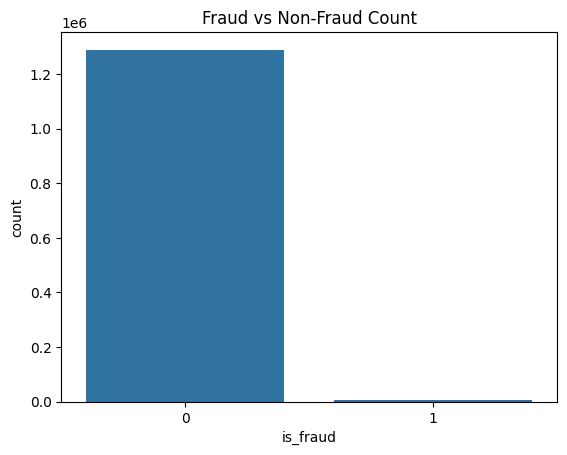

In [81]:
sns.countplot(x=df["is_fraud"])
plt.title("Fraud vs Non-Fraud Count")
plt.show()

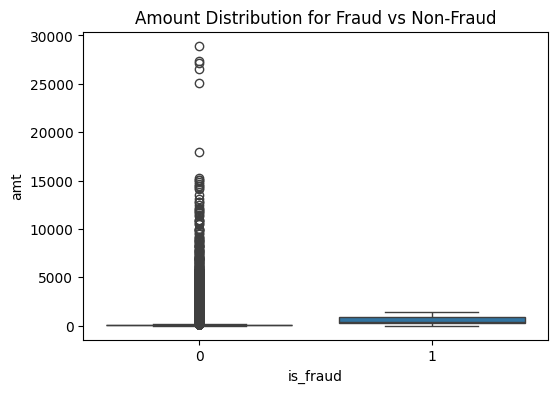

In [82]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="is_fraud", y="amt")
plt.title("Amount Distribution for Fraud vs Non-Fraud")
plt.show()

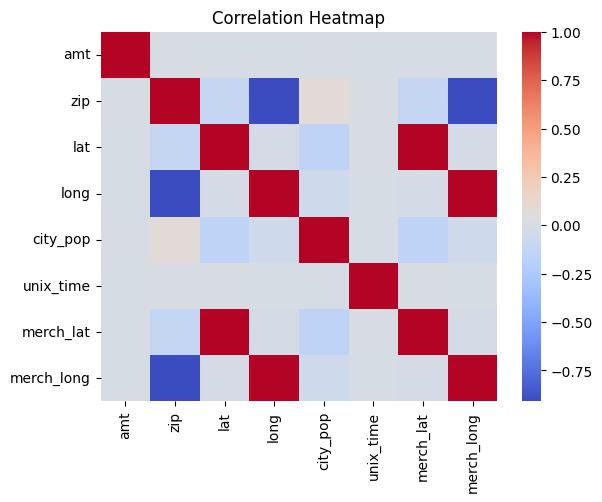

In [83]:
sns.heatmap(a.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

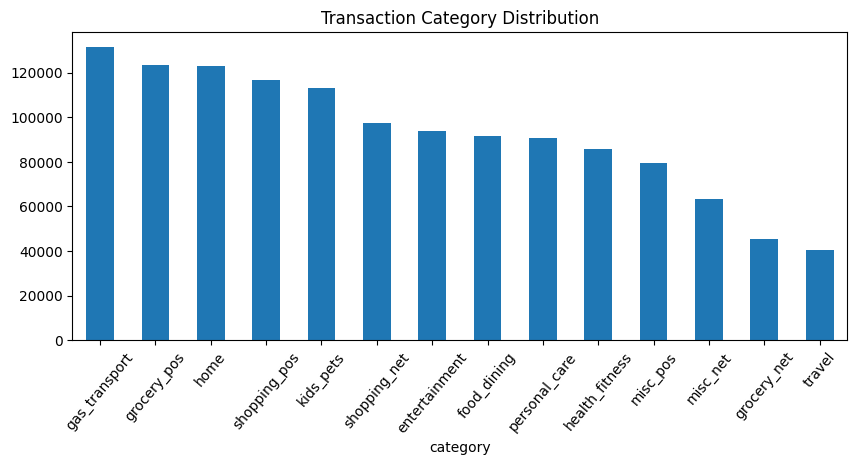

In [84]:
plt.figure(figsize=(10,4))
df["category"].value_counts().plot(kind='bar')
plt.title("Transaction Category Distribution")
plt.xticks(rotation= 50)
plt.show()

### Model Selection & Fitting

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

lr = LogisticRegression(
    C=0.5, 
    penalty='l2', 
    max_iter=300,
    class_weight= 'balanced'
    )


svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', LinearSVC(
        C=1.0,
        class_weight='balanced',
        max_iter=5000,
        random_state=37
    ))
])

gb = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=3,
    min_samples_split=30,
    min_samples_leaf=15,
    subsample=0.8
)


rf = RandomForestClassifier(
    n_estimators=120,
    max_depth=12,   
    min_samples_split=50,   
    min_samples_leaf=20,    
    max_features='sqrt', 
    class_weight='balanced',
    n_jobs=-1,
    random_state=62
)

In [86]:
#Logistic Regression

lr.fit(X_train,y_train)

lr_pred_test = lr.predict(X_test)
lr_pred_train = lr.predict(X_train)


#SVM

svm.fit(X_train,y_train)

svm_pred_test = svm.predict(X_test)
svm_pred_train = svm.predict(X_train)


#GradientBoost Classifier

gb.fit(X_train,y_train)

gb_pred_test = gb.predict(X_test)
gb_pred_train = gb.predict(X_train)


#RandomForest Classifier

rf.fit(X_train,y_train)

rf_pred_test = rf.predict(X_test)
rf_pred_train = rf.predict(X_train)

C:\Users\Amaan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 300 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=300).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Model Evaluation

In [87]:
from sklearn.metrics import recall_score, f1_score, confusion_matrix

models = {
    'Logistic Regression': (lr, lr_pred_train, lr_pred_test),
    'Support Vector': (svm, svm_pred_train, svm_pred_test),
    'Gradient Boosting': (gb, gb_pred_train, gb_pred_test),
    'RandomForest': (rf, rf_pred_train, rf_pred_test)
}

for model_name, (model, pred_train, pred_test) in models.items():
    print(f"--- {model_name} ---")
    
    # Training metrics
    rec_train = recall_score(y_train, pred_train, pos_label= 1)
    f1_train = f1_score(y_train, pred_train, pos_label= 1)
    cm_train = confusion_matrix(y_train, pred_train)
    
    print(f"Train Recall Score: {rec_train*100:2f}%")
    print(f"Train F1 Score: {f1_train*100:2f}%")
    print(f"Train Confusion Matrix:\n{cm_train}\n")

--- Logistic Regression ---
Train Recall Score: 76.083467%
Train F1 Score: 13.703977%
Train Confusion Matrix:
[[1011803   58207]
 [   1490    4740]]

--- Support Vector ---
Train Recall Score: 74.173355%
Train F1 Score: 21.902550%
Train Confusion Matrix:
[[1038665   31345]
 [   1609    4621]]

--- Gradient Boosting ---
Train Recall Score: 54.510433%
Train F1 Score: 65.082407%
Train Confusion Matrix:
[[1069200     810]
 [   2834    3396]]

--- RandomForest ---
Train Recall Score: 91.990369%
Train F1 Score: 45.998876%
Train Confusion Matrix:
[[1057053   12957]
 [    499    5731]]



In [88]:
for model_name, (model, pred_train, pred_test) in models.items():
    print(f"--- {model_name} ---")
    
    acc_test = recall_score(y_test, pred_test, pos_label= 1)
    f1_test = f1_score(y_test, pred_test, pos_label= 1)
    cm_test = confusion_matrix(y_test, pred_test)
    
    print(f"Test Recall Score: {(acc_test*100):.2f}%")
    print(f"Test F1 Score: {(f1_test*100):.2f}%")
    print(f"Test Confusion Matrix:\n{cm_test}\n")

--- Logistic Regression ---
Test Recall Score: 77.82%
Test F1 Score: 14.12%
Test Confusion Matrix:
[[207365  11794]
 [   283    993]]

--- Support Vector ---
Test Recall Score: 76.18%
Test F1 Score: 22.53%
Test Confusion Matrix:
[[212777   6382]
 [   304    972]]

--- Gradient Boosting ---
Test Recall Score: 57.76%
Test F1 Score: 67.43%
Test Confusion Matrix:
[[218986    173]
 [   539    737]]

--- RandomForest ---
Test Recall Score: 87.30%
Test F1 Score: 44.15%
Test Confusion Matrix:
[[216503   2656]
 [   162   1114]]



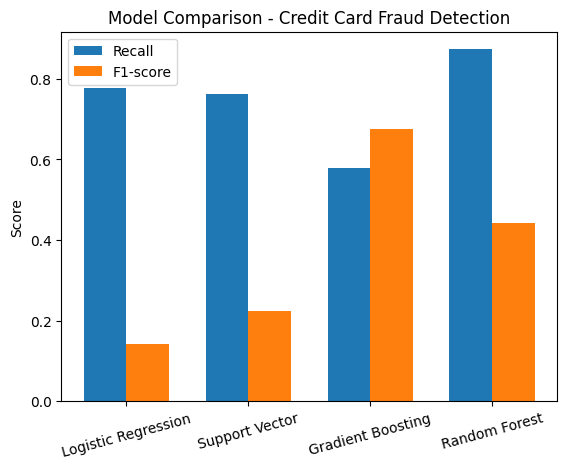

In [91]:
from sklearn.metrics import recall_score, f1_score, confusion_matrix

models = ['Logistic Regression', 'Support Vector', 'Gradient Boosting', 'Random Forest']

recall_scores = [
    recall_score(y_test, lr_pred_test),
    recall_score(y_test, svm_pred_test),
    recall_score(y_test, gb_pred_test),
    recall_score(y_test, rf_pred_test)
]

f1_scores = [
    f1_score(y_test, lr_pred_test),
    f1_score(y_test, svm_pred_test),
    f1_score(y_test, gb_pred_test),
    f1_score(y_test, rf_pred_test)
]

x = np.arange(len(models))
width = 0.35

plt.figure()
plt.bar(x - width/2, recall_scores, width, label='Recall')
plt.bar(x + width/2, f1_scores, width, label='F1-score')
plt.xticks(x, models, rotation=15)
plt.ylabel("Score")
plt.title("Model Comparison - Credit Card Fraud Detection")
plt.legend()
plt.show()

### Saving Best Model

In [ ]:
import joblib

best_model = gb
joblib.dump(best_model, 'gradient_boosting_fraud_model.pkl')
print("Best model saved as gradient_boosting_fraud_model.pkl")

Best model saved as gradient_boosting_fraud_model.pkl
